In [ ]:
!pip install kaggle

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Kaggle api
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:01<00:00, 105MB/s] 
100% 163M/163M [00:01<00:00, 97.9MB/s]


In [3]:
from zipfile import ZipFile
path = '/content/face-mask-dataset.zip'
with ZipFile(path,'r') as zip:
  zip.extractall()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask = os.listdir('/content/data/with_mask')

without_mask = os.listdir('/content/data/without_mask')
print(len(with_mask),len(without_mask))

3725 3828


In [6]:
with_mask_label = [1]*len(with_mask)
without_mask_label = [0]*len(without_mask)

(183, 275, 3)


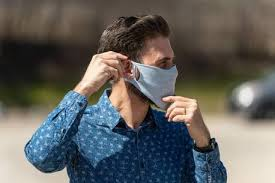

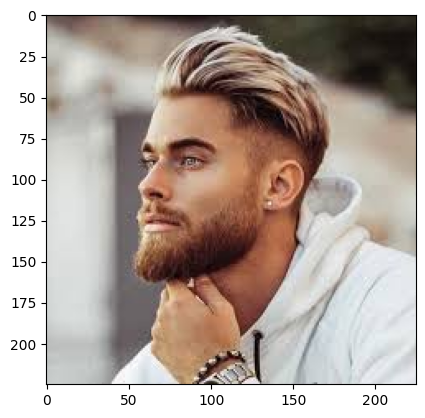

In [7]:
img = cv2.imread('/content/data/with_mask/with_mask_2590.jpg')
print(img.shape)
cv2_imshow(img)
img = mpimg.imread('/content/data/without_mask/without_mask_2590.jpg')
plt.imshow(img)

* IMAGE RESIZING
* CONVERSION OF IMG TO NUMPYND

In [8]:
with_mask = '/content/data/with_mask/'

data=[]
for img in os.listdir(with_mask):
  image = Image.open(with_mask + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask = '/content/data/without_mask/'

for img in os.listdir(without_mask):
  image = Image.open(without_mask + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
type(data)

list

In [10]:
X=np.array(data)
label = with_mask_label+without_mask_label
Y = np.array(label)

In [11]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


In [12]:
Y_reshaped = Y[:, np.newaxis]
print(Y_reshaped.shape)

(7553, 1)


In [13]:

# ddd = np.column_stack((X,Y_reshaped))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [15]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [16]:
df = pd.DataFrame(y_test)

In [17]:
df[0].value_counts()

0
0    768
1    743
Name: count, dtype: int64

In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

CNN


In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
#2 because 2 op classes
model.add(Dense(1,activation='sigmoid'))


In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 15s 29ms/step - loss: 0.4781 - accuracy: 0.7861 - val_loss: 0.2812 - val_accuracy: 0.8843
Epoch 2/10
170/170 [==============================] - 5s 28ms/step - loss: 0.2923 - accuracy: 0.8812 - val_loss: 0.2432 - val_accuracy: 0.8992
Epoch 3/10
170/170 [==============================] - 4s 24ms/step - loss: 0.2486 - accuracy: 0.9022 - val_loss: 0.2018 - val_accuracy: 0.9157
Epoch 4/10
170/170 [==============================] - 4s 24ms/step - loss: 0.2187 - accuracy: 0.9097 - val_loss: 0.2035 - val_accuracy: 0.9174
Epoch 5/10
170/170 [==============================] - 4s 22ms/step - loss: 0.1787 - accuracy: 0.9286 - val_loss: 0.1842 - val_accuracy: 0.9273
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1590 - accuracy: 0.9399 - val_loss: 0.2083 - val_accuracy: 0.9157
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1430 - accuracy: 0.9456 - val_loss: 0.2182 - val_accuracy: 0.919

In [22]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)

48/48 [==============================] - 1s 11ms/step - loss: 0.2190 - accuracy: 0.9312


In [23]:
print(loss,accuracy)

0.21904732286930084 0.9311714172363281


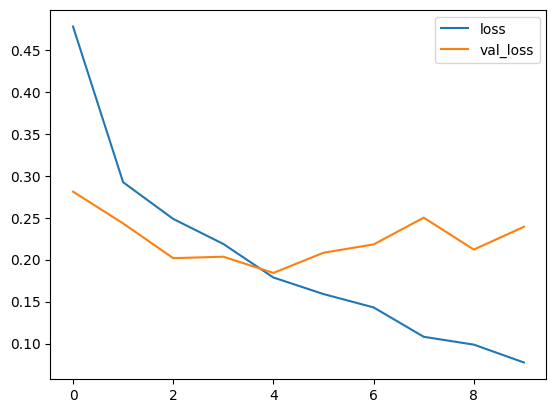

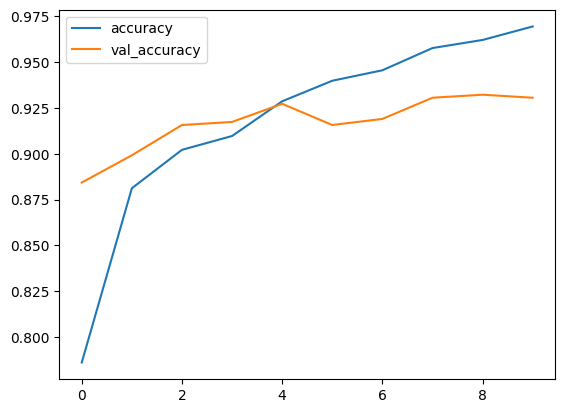

In [24]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


#HENCE , EPOCH SIZE MUST BE 5

In [25]:
model = 0

In [26]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 7s 23ms/step - loss: 0.4509 - accuracy: 0.8025 - val_loss: 0.2655 - val_accuracy: 0.8975
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2866 - accuracy: 0.8849 - val_loss: 0.2260 - val_accuracy: 0.9008
Epoch 3/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2294 - accuracy: 0.9033 - val_loss: 0.2088 - val_accuracy: 0.9140
Epoch 4/5
170/170 [==============================] - 4s 24ms/step - loss: 0.2318 - accuracy: 0.9025 - val_loss: 0.2160 - val_accuracy: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1965 - accuracy: 0.9213 - val_loss: 0.2467 - val_accuracy: 0.8992


## PREDICTIVE SYSTEM

In [27]:
import pickle
pickle.dump(model,open("cnnmodel.pkl","wb"))

In [29]:
# if new time
import pickle
model = pickle.load(open("cnnmodel.pkl",'rb'))

path of image to be predicted/content/data/without_mask/without_mask_1518.jpg
(1, 128, 128, 3)
1/1 [==============================] - 0s 20ms/step
[[0.04240543]]
person not wearing mask



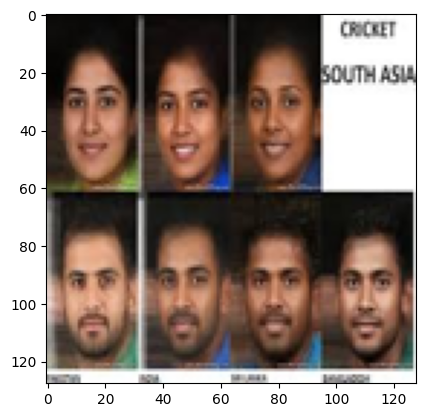

In [42]:
input_img_path = input('path of image to be predicted')
# input_img = cv2.imread(input_img_path)
# input_img_resized = cv2.resize(input_img,(128,128))
# input_img_scaled = input_img_resized/255
# input_image_reshaped = np.reshape(input_img_scaled,[1,128,128,3])
image = Image.open(input_img_path)
plt.imshow(image)
image = image.resize((128,128))
plt.imshow(image)
image = image.convert('RGB')
plt.imshow(image)
image = np.array(image)
img_scaled= image/255

img_scaled = np.reshape(img_scaled,[1,128,128,3])
print(img_scaled.shape)

input_pred = model.predict(img_scaled)
print(input_pred)
ip_label = 1 if (input_pred>=0.5) else 0
if(ip_label==1):
  print("person is wearing mask\n")
else:
  print("person not wearing mask\n")


